# DATA EXPLORATION AND PREPROCESSING (Part B)

## Question 1: Outliers removal and transformation


In [538]:
# importing packages
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kurtosis
import seaborn as sns
from scipy import stats

In [539]:
# reading csv file and printing first 5 rows
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.0,35,0,33.6,0.627,50,1
1,1,85,66.0,29,0,26.6,0.351,31,0
2,8,183,64.0,0,0,23.3,0.672,32,1
3,1,89,66.0,23,94,28.1,0.167,21,0
4,0,137,40.0,35,168,43.1,2.288,15,1


In [540]:
# (a) finding the kurtosis and skewness values of the Insulin attribute? 
kurtosis = df["Insulin"].kurtosis()
skewness = df["Insulin"].skew()

print("The kurtosis for Insulin is", kurtosis)
print("The skewness for Insulin is", skewness)

The kurtosis for Insulin is 7.265911343503076
The skewness for Insulin is 2.268393486537506


- Kurtosis measures whether data is heavy-tailed or light-tailed. If kurtosis > 3, it has a thick tail, and if kurtosis < 3, it has a thin tail.

- Skewness is a statistical measure of the symmetry of a probability distribution. Whether it is skewed to one side. If the skewness is lower than -1 it is negatively (left) skewed or greater than 1 it is positively (right) skewed.



Here kurtosis is greater than 3 which means it has a thick tail, this means there are more chances of outliers.

In terms of skewness, it is skewed right.

In [541]:
# (b) filtering the dataframe and selecting only the rows where Insulin is not equal to 0 
df = df.loc[df["Insulin"] != 0]
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89,66.0,23,94,28.1,0.167,21,0
4,0,137,40.0,35,168,43.1,2.288,15,1
6,3,78,50.0,32,88,31.0,0.248,26,1
8,2,197,70.0,45,543,30.5,0.158,53,1
13,1,189,60.0,23,846,30.1,0.398,59,1
...,...,...,...,...,...,...,...,...,...
778,2,129,74.0,26,205,33.2,0.591,25,0
781,1,140,74.0,26,180,24.1,0.828,23,0
782,1,144,82.0,46,180,46.1,0.335,46,1
785,2,121,70.0,32,95,39.1,0.886,23,0


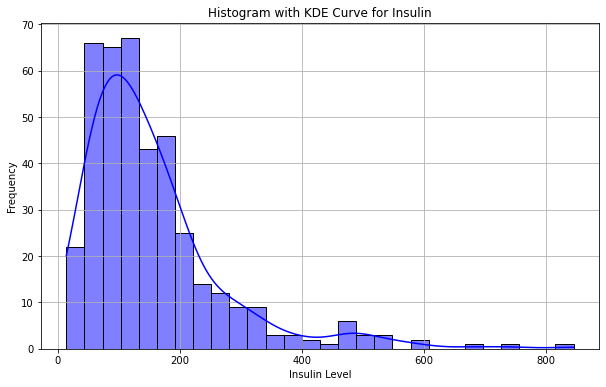

In [542]:
# (c) drawing histogram of Insulin column along with kernel density estimation (KDE) curb
plt.figure(figsize=(10, 6))  
sns.histplot(df["Insulin"], color="blue", kde=True)

# labels
plt.ylabel("Frequency")
plt.xlabel("Insulin Level")
plt.title("Histogram with KDE Curve for Insulin")

plt.grid(True)
plt.show()

From this histogram we can see that the distribution is skewed right. The tail is long and flat on the right side with some high outliers.

In [543]:
# (d) identifying outliers of Insulin using Inter Quartile Range (IQR), approaching and imputing them with min and max values appropriately.
q1 = df["Insulin"].quantile(0.25)
q3 = df["Insulin"].quantile(0.75)
iqr = q3 - q1

print("Q1:", q1)
print("Q3:", q3)
print("Interquartile Range:", iqr)

Q1: 77.0
Q3: 190.0
Interquartile Range: 113.0


In [544]:
# outliers will be below lower and above upper
lower = q1-1.5*iqr
upper = q3+1.5*iqr
print("Lower bound:", lower)
print("Upper bound:", upper)

Lower bound: -92.5
Upper bound: 359.5


In [545]:
# displaying outliers
outliers = df.loc[(df["Insulin"] < lower) | (df["Insulin"] > upper)]
print("Dataframe of outliers:")
outliers

Dataframe of outliers:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
8,2,197,70.0,45,543,30.5,0.158,53,1
13,1,189,60.0,23,846,30.1,0.398,59,1
111,8,155,62.0,26,495,34.0,0.543,46,1
153,1,153,82.0,42,485,40.6,0.687,23,0
186,8,181,68.0,36,495,30.1,0.615,60,1
220,0,177,60.0,29,478,34.6,1.072,21,1
228,4,197,70.0,39,744,36.7,2.329,31,0
231,6,134,80.0,37,370,46.2,0.238,46,1
247,0,165,90.0,33,680,52.3,0.427,23,0
248,9,124,70.0,33,402,35.4,0.282,34,0


In [546]:
# converting low outliers to lower bound value and high outliers to high bound value
df.loc[df["Insulin"] < lower, "Insulin"] = lower
df.loc[df["Insulin"] > upper, "Insulin"] = upper
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89,66.0,23,94.0,28.1,0.167,21,0
4,0,137,40.0,35,168.0,43.1,2.288,15,1
6,3,78,50.0,32,88.0,31.0,0.248,26,1
8,2,197,70.0,45,359.5,30.5,0.158,53,1
13,1,189,60.0,23,359.5,30.1,0.398,59,1
...,...,...,...,...,...,...,...,...,...
778,2,129,74.0,26,205.0,33.2,0.591,25,0
781,1,140,74.0,26,180.0,24.1,0.828,23,0
782,1,144,82.0,46,180.0,46.1,0.335,46,1
785,2,121,70.0,32,95.0,39.1,0.886,23,0


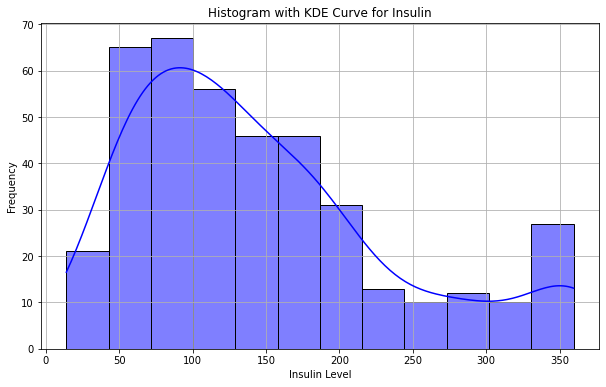

In [547]:
# histogram of Insulin
plt.figure(figsize=(10, 6)) 
sns.histplot(df["Insulin"], color="blue", kde=True)

# labels
plt.xlabel("Insulin Level")
plt.ylabel("Frequency")
plt.title("Histogram with KDE Curve for Insulin")

plt.grid(True)
plt.show()

In [548]:
# (e) Transforming Insulin column using loge(x+1) formula to make the Insulin values follow the normal distribution 
df_before_insulin_transform = df.copy()

# np.log1p is loge(x + 1)
df["Insulin"] = np.log1p(df["Insulin"])
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89,66.0,23,4.553877,28.1,0.167,21,0
4,0,137,40.0,35,5.129899,43.1,2.288,15,1
6,3,78,50.0,32,4.488636,31.0,0.248,26,1
8,2,197,70.0,45,5.887492,30.5,0.158,53,1
13,1,189,60.0,23,5.887492,30.1,0.398,59,1
...,...,...,...,...,...,...,...,...,...
778,2,129,74.0,26,5.327876,33.2,0.591,25,0
781,1,140,74.0,26,5.198497,24.1,0.828,23,0
782,1,144,82.0,46,5.198497,46.1,0.335,46,1
785,2,121,70.0,32,4.564348,39.1,0.886,23,0


In [549]:
# (f) finding the kurtosis and skewness values of the Insulin attribute
kurtosis = df["Insulin"].kurtosis()
skewness = df["Insulin"].skew()

print("The kurtosis for Insulin is", kurtosis)
print("The skewness for Insulin is", skewness)

The kurtosis for Insulin is 0.04668578356986641
The skewness for Insulin is -0.39424325557435635


# Comment from

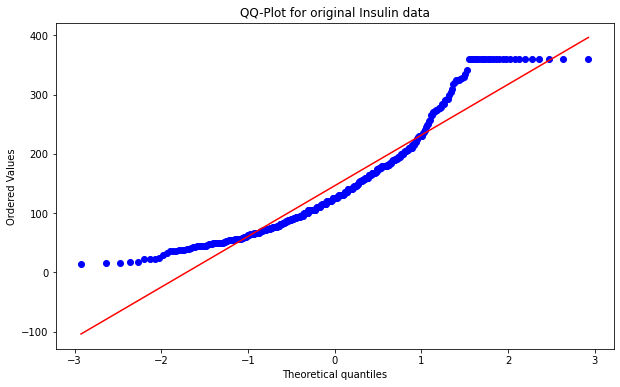

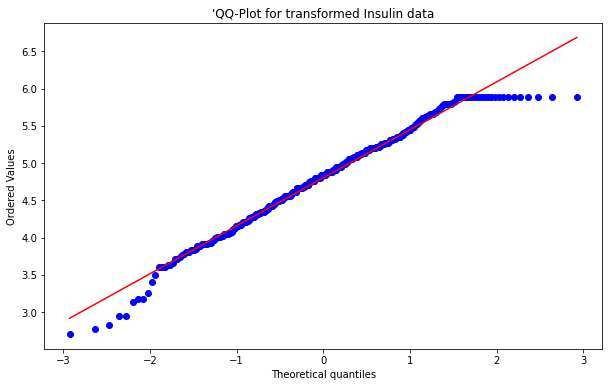

In [550]:
# (g) Use a QQ-plot to compare before and after the loge(x+1) transformation on Insulin column.
# QQ plot before log transformation
plt.figure(figsize=(10, 6))
stats.probplot(df_before_insulin_transform["Insulin"], plot=plt)
plt.title("QQ-Plot for original Insulin data")
plt.show()

# QQ plot after log transformation
plt.figure(figsize=(10, 6))
stats.probplot(df["Insulin"], plot=plt)
plt.title("'QQ-Plot for transformed Insulin data")
plt.show()

Above you can see the dots more accurately follow along the red line after the transformation.

(h) Detect  and  correct  outliers  in  the  'Glucose', 'BloodPressure'  and  'SkinThickness' columns

Glucose:

In [551]:
# getting IQR
q1 = df["Glucose"].quantile(0.25)
q3 = df["Glucose"].quantile(0.75)
iqr = q3 - q1

print("Q1:", q1)
print("Q3:", q3)
print("Interquartile Range:", iqr)

Q1: 99.0
Q3: 143.0
Interquartile Range: 44.0


In [552]:
# outliers will be below lower and above upper
lower = q1-1.5*iqr
upper = q3+1.5*iqr
print("Lower bound:", lower)
print("Upper bound:", upper)

Lower bound: 33.0
Upper bound: 209.0


In [553]:
# displaying outliers
outliers = df.loc[(df["Glucose"] < lower) | (df["Glucose"] > upper)]
print("Dataframe of outliers:")
outliers.head()

Dataframe of outliers:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
182,1,0,74.0,20,3.178054,27.7,0.299,21,0


In [554]:
# changing outliers
df.loc[df["Glucose"] < lower, "Glucose"] = lower
df.loc[df["Glucose"] > upper, "Glucose"] = upper
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89,66.0,23,4.553877,28.1,0.167,21,0
4,0,137,40.0,35,5.129899,43.1,2.288,15,1
6,3,78,50.0,32,4.488636,31.0,0.248,26,1
8,2,197,70.0,45,5.887492,30.5,0.158,53,1
13,1,189,60.0,23,5.887492,30.1,0.398,59,1
...,...,...,...,...,...,...,...,...,...
778,2,129,74.0,26,5.327876,33.2,0.591,25,0
781,1,140,74.0,26,5.198497,24.1,0.828,23,0
782,1,144,82.0,46,5.198497,46.1,0.335,46,1
785,2,121,70.0,32,4.564348,39.1,0.886,23,0


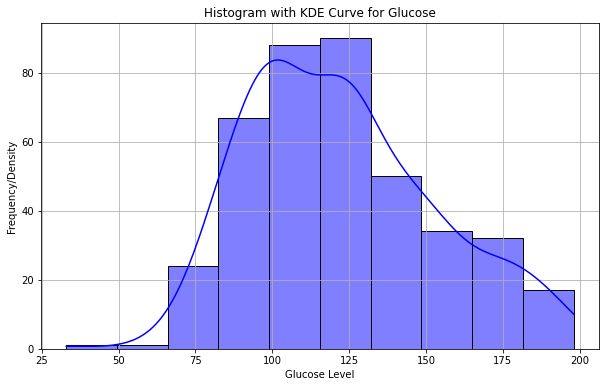

In [555]:
# histogram of Glucose
plt.figure(figsize=(10, 6)) 
sns.histplot(df["Glucose"], bins=10, color="blue", kde=True)

# labels
plt.xlabel("Glucose Level")
plt.ylabel("Frequency/Density")
plt.title("Histogram with KDE Curve for Glucose")

plt.grid(True)
plt.show()

BloodPressure:

In [556]:
# finding IQR
q1 = df["BloodPressure"].quantile(0.25)
q3 = df["BloodPressure"].quantile(0.75)
iqr = q3 - q1

print("Q1:", q1)
print("Q3:", q3)
print("Interquartile Range:", iqr)

Q1: 62.0
Q3: 78.0
Interquartile Range: 16.0


In [557]:
# outliers will be below lower and above upper
lower = q1-1.5*iqr
upper = q3+1.5*iqr
print("Lower bound:", lower)
print("Upper bound:", upper)

Lower bound: 38.0
Upper bound: 102.0


In [558]:
# displaying outliers
outliers = df.loc[(df["BloodPressure"] < lower) | (df["BloodPressure"] > upper)]
print("Dataframe of outliers:")
outliers.head()

Dataframe of outliers:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
18,1,103,30.0,38,4.430817,43.3,0.183,33,0
43,9,171,110.0,24,5.484797,45.4,0.721,54,1
125,1,88,30.0,42,4.605170,55.0,0.496,26,1
177,0,129,110.0,46,4.875197,67.1,0.319,26,1
597,1,89,24.0,19,3.258097,27.8,0.559,21,0


In [559]:
# changing outliers
df.loc[df["BloodPressure"] < lower, "BloodPressure"] = lower
df.loc[df["BloodPressure"] > upper, "BloodPressure"] = upper
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89,66.0,23,4.553877,28.1,0.167,21,0
4,0,137,40.0,35,5.129899,43.1,2.288,15,1
6,3,78,50.0,32,4.488636,31.0,0.248,26,1
8,2,197,70.0,45,5.887492,30.5,0.158,53,1
13,1,189,60.0,23,5.887492,30.1,0.398,59,1
...,...,...,...,...,...,...,...,...,...
778,2,129,74.0,26,5.327876,33.2,0.591,25,0
781,1,140,74.0,26,5.198497,24.1,0.828,23,0
782,1,144,82.0,46,5.198497,46.1,0.335,46,1
785,2,121,70.0,32,4.564348,39.1,0.886,23,0


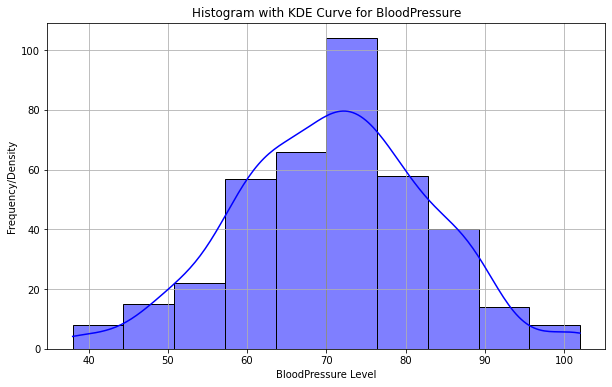

In [560]:
# histogram of BloodPressure
plt.figure(figsize=(10, 6)) 
sns.histplot(df['BloodPressure'], bins=10, color="blue", kde=True)

# labels
plt.xlabel("BloodPressure Level")
plt.ylabel("Frequency/Density")
plt.title("Histogram with KDE Curve for BloodPressure")

plt.grid(True)
plt.show()

SkinThickness:

In [561]:
# getting IQR
q1 = df["SkinThickness"].quantile(0.25)
q3 = df["SkinThickness"].quantile(0.75)
iqr = q3 - q1

print("Q1:", q1)
print("Q3:", q3)
print("Interquartile Range:", iqr)

Q1: 21.0
Q3: 37.0
Interquartile Range: 16.0


In [562]:
# outliers will be below lower and above upper
lower = q1-1.5*iqr
upper = q3+1.5*iqr
print("Lower bound:", lower)
print("Upper bound:", upper)

Lower bound: -3.0
Upper bound: 61.0


In [563]:
# displaying outliers
outliers = df.loc[(df["SkinThickness"] < lower) | (df["SkinThickness"] > upper)]
print("Dataframe of outliers:")
outliers.head()

Dataframe of outliers:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
445,0,180,78.0,63,2.70805,59.4,2.42,25,1


In [564]:
# changing outliers
df.loc[df["SkinThickness"] < lower, "SkinThickness"] = lower
df.loc[df["SkinThickness"] > upper, "SkinThickness"] = upper
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89,66.0,23,4.553877,28.1,0.167,21,0
4,0,137,40.0,35,5.129899,43.1,2.288,15,1
6,3,78,50.0,32,4.488636,31.0,0.248,26,1
8,2,197,70.0,45,5.887492,30.5,0.158,53,1
13,1,189,60.0,23,5.887492,30.1,0.398,59,1
...,...,...,...,...,...,...,...,...,...
778,2,129,74.0,26,5.327876,33.2,0.591,25,0
781,1,140,74.0,26,5.198497,24.1,0.828,23,0
782,1,144,82.0,46,5.198497,46.1,0.335,46,1
785,2,121,70.0,32,4.564348,39.1,0.886,23,0


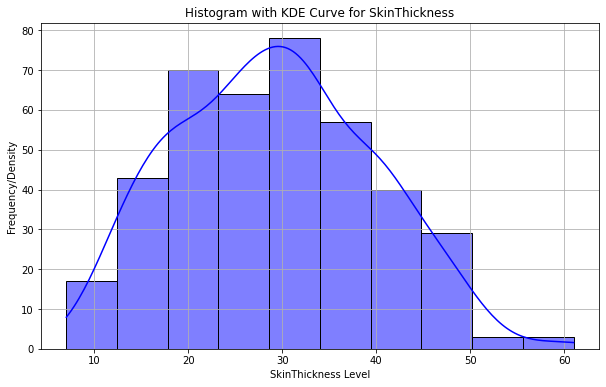

In [565]:
# histogram of SkinThickness
plt.figure(figsize=(10, 6))
sns.histplot(df["SkinThickness"], bins=10, color="blue", kde=True)

# labels
plt.xlabel("SkinThickness Level")
plt.ylabel("Frequency/Density")
plt.title("Histogram with KDE Curve for SkinThickness")

plt.grid(True)
plt.show()

In [566]:
# (i) Displaying the correlation matrix using the seaborn heatmap function between continuous variables; Pregnancies, Glocose, BloodPressure, SkinThickness, Insulin, BMI, Age.
columns = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "Age"]
df_for_corr = df[columns]

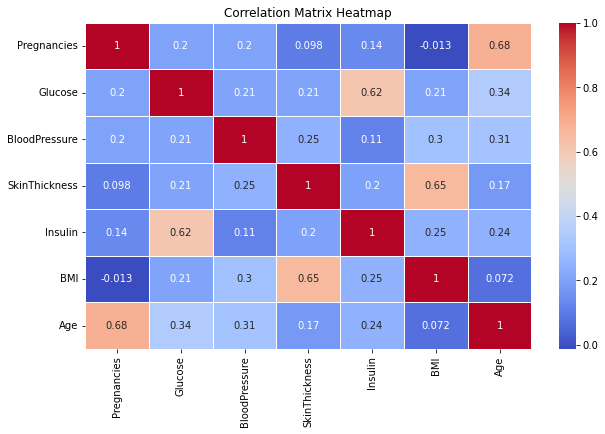

In [567]:
# creating correlation matrix
correlation_matrix = df_for_corr.corr()

# heatmap of the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

## Question 2: Data Processing

In [568]:
# (a) Grouping the patients by number of pregnancies, along with their average BloodPressure
preg_bp = df.groupby("Pregnancies")["BloodPressure"].mean()
preg_bp

Pregnancies
0     73.263158
1     68.468085
2     66.107692
3     70.177778
4     70.458333
5     73.300000
6     67.052632
7     72.476190
8     78.285714
9     80.666667
10    81.600000
11    81.600000
12    74.400000
13    86.666667
14    78.000000
15    70.000000
17    72.000000
Name: BloodPressure, dtype: float64

In [569]:
# (b) Grouping the patients by number of pregnancies, along with the average age, sum of all ages in that group,
# and the count of patients in that group
preg_age = df.groupby("Pregnancies").agg(Average_Age=("Age", "mean"), Sum_Age=("Age", "sum"), Count_Patients=("Age", "count"))
preg_age

,Average_Age,Sum_Age,Count_Patients
Pregnancies,,,
0,24.258621,1407,58
1,27.122449,2658,98
2,25.194030,1688,67
3,28.244444,1271,45
4,30.407407,821,27
5,34.666667,728,21
6,38.368421,729,19
7,42.761905,898,21
8,44.714286,626,14


In [570]:
# (c) Adding a new column named ‘BMI/Age’ with the value of BMI over the Age, without using any loops
df["BMI/Age"] = df["BMI"]/df["Age"]
df


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI/Age
3,1,89,66.0,23,4.553877,28.1,0.167,21,0,1.338095
4,0,137,40.0,35,5.129899,43.1,2.288,15,1,2.873333
6,3,78,50.0,32,4.488636,31.0,0.248,26,1,1.192308
8,2,197,70.0,45,5.887492,30.5,0.158,53,1,0.575472
13,1,189,60.0,23,5.887492,30.1,0.398,59,1,0.510169
...,...,...,...,...,...,...,...,...,...,...
778,2,129,74.0,26,5.327876,33.2,0.591,25,0,1.328000
781,1,140,74.0,26,5.198497,24.1,0.828,23,0,1.047826
782,1,144,82.0,46,5.198497,46.1,0.335,46,1,1.002174
785,2,121,70.0,32,4.564348,39.1,0.886,23,0,1.700000


In [571]:
# Without looping the rows, add a new column named ‘risk’ with the following rules: 
# a. High: if BMI > 45 and BloodPressure > 100 
# b. Medium: if 30 < BMI < 45 and BloodPressure < 100 
# c. Low: if BMI < 30 
# d. Unknown: otherwise

# creating rules
rules = [(df["BMI"] > 45) & (df["BloodPressure"] > 100), (df["BMI"] > 30) & (df["BMI"] < 45) & (df["BloodPressure"] < 100), df["BMI"] < 30]
values = ["High", "Medium", "Low"]

# creating risk column
df["Risk"] = np.select(rules, values, default="Unknown")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI/Age,Risk
3,1,89,66.0,23,4.553877,28.1,0.167,21,0,1.338095,Low
4,0,137,40.0,35,5.129899,43.1,2.288,15,1,2.873333,Medium
6,3,78,50.0,32,4.488636,31.0,0.248,26,1,1.192308,Medium
8,2,197,70.0,45,5.887492,30.5,0.158,53,1,0.575472,Medium
13,1,189,60.0,23,5.887492,30.1,0.398,59,1,0.510169,Medium
...,...,...,...,...,...,...,...,...,...,...,...
778,2,129,74.0,26,5.327876,33.2,0.591,25,0,1.328000,Medium
781,1,140,74.0,26,5.198497,24.1,0.828,23,0,1.047826,Low
782,1,144,82.0,46,5.198497,46.1,0.335,46,1,1.002174,Unknown
785,2,121,70.0,32,4.564348,39.1,0.886,23,0,1.700000,Medium


In [572]:
# (e) The file named ages.csv provides the age group names. Merge the two dataframes by the age, 
# the resulted dataframe must contain all the columns of diabetes.csv, in addition to their age 
# group in the column named ‘AgeGroup’

# loading csv
df_ages = pd.read_csv("ages.csv")
df_ages

,Age,AgeGroup
0,1,Children
1,2,Children
2,3,Children
3,4,Children
4,5,Children
...,...,...
114,115,Senior
115,116,Senior
116,117,Senior
117,118,Senior


In [573]:
# merging df's by Age
df = pd.merge(df, df_ages, how="left", on="Age")
df


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI/Age,Risk,AgeGroup
0,1,89,66.0,23,4.553877,28.1,0.167,21,0,1.338095,Low,Adult
1,0,137,40.0,35,5.129899,43.1,2.288,15,1,2.873333,Medium,Adolescent
2,3,78,50.0,32,4.488636,31.0,0.248,26,1,1.192308,Medium,Adult
3,2,197,70.0,45,5.887492,30.5,0.158,53,1,0.575472,Medium,Adult
4,1,189,60.0,23,5.887492,30.1,0.398,59,1,0.510169,Medium,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...
399,2,129,74.0,26,5.327876,33.2,0.591,25,0,1.328000,Medium,Adult
400,1,140,74.0,26,5.198497,24.1,0.828,23,0,1.047826,Low,Adult
401,1,144,82.0,46,5.198497,46.1,0.335,46,1,1.002174,Unknown,Adult
402,2,121,70.0,32,4.564348,39.1,0.886,23,0,1.700000,Medium,Adult


In [574]:
# (f) one-hot  encode  the  categorical  variable ‘AgeGroup’  and  add  the  resulting  columns  to  the dataframe, 
# and remove AgeGroup

# one hot encoding with get_dummies
one_hot = pd.get_dummies(df["AgeGroup"], prefix="AgeGroup")
df = pd.concat([df, one_hot], axis=1)

# removing AgeGroup
df.drop("AgeGroup", axis=1, inplace=True)
df


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI/Age,Risk,AgeGroup_Adolescent,AgeGroup_Adult,AgeGroup_Senior
0,1,89,66.0,23,4.553877,28.1,0.167,21,0,1.338095,Low,0,1,0
1,0,137,40.0,35,5.129899,43.1,2.288,15,1,2.873333,Medium,1,0,0
2,3,78,50.0,32,4.488636,31.0,0.248,26,1,1.192308,Medium,0,1,0
3,2,197,70.0,45,5.887492,30.5,0.158,53,1,0.575472,Medium,0,1,0
4,1,189,60.0,23,5.887492,30.1,0.398,59,1,0.510169,Medium,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,2,129,74.0,26,5.327876,33.2,0.591,25,0,1.328000,Medium,0,1,0
400,1,140,74.0,26,5.198497,24.1,0.828,23,0,1.047826,Low,0,1,0
401,1,144,82.0,46,5.198497,46.1,0.335,46,1,1.002174,Unknown,0,1,0
402,2,121,70.0,32,4.564348,39.1,0.886,23,0,1.700000,Medium,0,1,0
